In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def rem_out(df):
    m = df['Profit'].mean()
    std = df['Profit'].std()
    df = df[(df['Profit'] <= m + 2.5 * std) & (df['Profit'] >= m - 2.5 * std)]
    return df

In [25]:
df = pd.read_csv('data.csv', encoding='windows-1252')
cons = df[df['Segment'] == 'Consumer']
cons = rem_out(cons)
home = df[df['Segment'] == 'Home Office']
home = rem_out(home)
corp = df[df['Segment'] == 'Corporate']
corp = rem_out(corp)
print(cons.shape)
print(home.shape)
print(corp.shape)

(1652, 19)
(650, 19)
(964, 19)


Text(0.5, 1.0, 'Consumer')

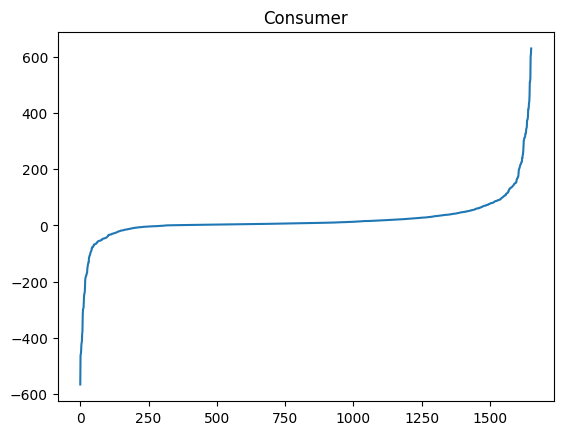

In [26]:
plt.plot(sorted(cons['Profit']))
plt.title('Consumer')

Text(0.5, 1.0, 'Home Office')

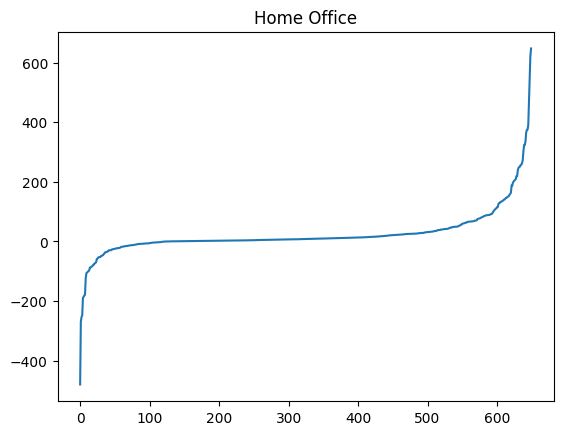

In [27]:
plt.plot(sorted(home['Profit']))
plt.title('Home Office')

Text(0.5, 1.0, 'Corporate')

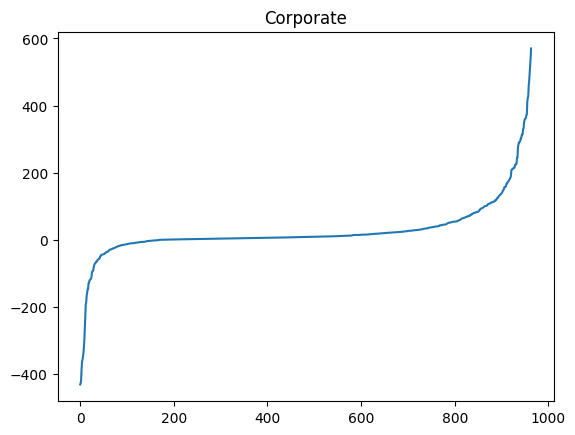

In [28]:
plt.plot(sorted(corp['Profit']))
plt.title('Corporate')